<a href="https://colab.research.google.com/github/Coypirus/PoliticalDashboard/blob/master/PolitiQuack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##Peter
import json
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
##Peter
VOCAB_SIZE = 100000
EMBEDDING_DIM = 16
MAX_LENGTH = 200
TRUNC_TYPE='post'
PADDING_TYPE='post'
OOV_TOK = "<OOV>" #Out Of Vocabulary Handling
TRAIN_SIZE = 18000


In [ ]:
##Maybe Peter
!wget --no-check-certificate \
    https://raw.githubusercontent.com/Coypirus/PoliticalDashboard/master/fake_news_json.json \
    -O /tmp/fake_news_json.json

    

--2020-09-12 19:43:13--  https://raw.githubusercontent.com/Coypirus/PoliticalDashboard/master/fake_news_json.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2378064 (2.3M) [text/plain]
Saving to: ‘/tmp/fake_news_json.json’

/tmp/fake_news_json 100%[===================>]   2.27M  --.-KB/s    in 0.07s   

2020-09-12 19:43:13 (32.4 MB/s) - ‘/tmp/fake_news_json.json’ saved [2378064/2378064]



In [ ]:
##Peter
with open("/tmp/fake_news_json.json", 'r') as filename:
    data_store = json.load(filename)

sentences = []
labels = []

for item in data_store:
    sentences.append(item['field_0'])##insert json keys here
    labels.append(item['field_1'])





In [ ]:
##Peter
train_sentences = sentences[0:TRAIN_SIZE]
test_sentences = sentences[TRAIN_SIZE:]
train_labels = labels[0:TRAIN_SIZE]
test_labels = labels[TRAIN_SIZE:]

In [ ]:
##Peter
##Assign Tokens for the words, and convert the sentences to token sequences.
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token=OOV_TOK)
tokenizer.fit_on_texts(train_sentences)

wordIndex = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, maxlen=MAX_LENGTH, padding=PADDING_TYPE, truncating=TRUNC_TYPE)

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, maxlen=MAX_LENGTH, padding=PADDING_TYPE, truncating=TRUNC_TYPE)

In [ ]:
#Convert to ndarrays
train_padded = np.array(train_padded)
train_labels = np.array(train_labels)
 
test_padded = np.array(test_padded)
test_labels = np.array(test_labels)



In [ ]:
###Checking our conversions : Sourced from Laurence Moroney's TF course.
reverse_word_index = dict([(value, key) for (key, value) in wordIndex.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(train_padded[0]))
print(train_sentences[0])
print(labels[0])

reince priebus does weird balancing act regarding trump’s ‘rigged election’ talk ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
 Reince Priebus Does WEIRD Balancing Act Regarding Trump’s ‘Rigged Election’ Talk
1


In [ ]:
##The Neural Net Architechture
quacker = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LENGTH),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') #Activation test needed: Softmax vs Sigmoid
])
quacker.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
quacker.summary()##Only for dev stages

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 16)           1600000   
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 30)                510       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 1,600,541
Trainable params: 1,600,541
Non-trainable params: 0
_________________________________________________________________


In [ ]:
class QuackCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.87):
      print("\nReached 93% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = QuackCallback()

In [ ]:
NUM_EPOCHS = 30##Possibly change this

In [ ]:
##Fit the model to training data
history = quacker.fit(train_padded, train_labels, epochs=NUM_EPOCHS, validation_data=(test_padded, test_labels), verbose=2, callbacks = [callbacks] )

Epoch 1/30
563/563 - 7s - loss: 0.6010 - accuracy: 0.7647 - val_loss: 0.3614 - val_accuracy: 0.9295
Epoch 2/30

Reached 93% accuracy so cancelling training!
563/563 - 7s - loss: 0.2073 - accuracy: 0.9467 - val_loss: 0.1658 - val_accuracy: 0.9422


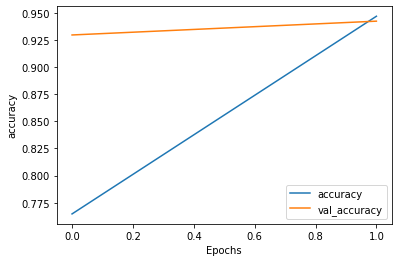

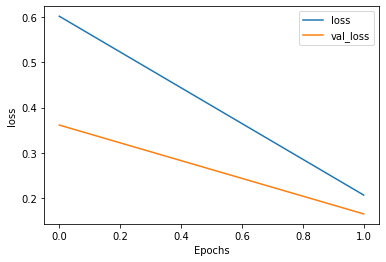

In [ ]:
##Visualization of Eval Metrics
##Source Laurence Moroney's TF Course
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
quacker.save('FakeDetection.h5') 

In [ ]:
##The Actual Thing.
# sentences = input()

##Peter
fake_detection = input()
sentence = []
sentence.append(fake_detection)
sentence = np.array(sentence, dtype = str)
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=MAX_LENGTH, padding=PADDING_TYPE, truncating=TRUNC_TYPE)

print(quacker.predict(padded))

Relaying bogus charges from account that is suspended
[[0.8609023]]


In [ ]:
## Full Page Evaluation

# Finding Mean
length = len(vals)
total = 0.0;
for val in vals:
  total += val

mean = total/length

# Finding Mode

bad = 0;
good = 0;

for val in vals:
  if (round(val)==0):
    bad+=1
  else:
    good+=1

if (good>bad):
  mode = 1
else:
  mode = 0;

verdict = 0

if (round(mean)==1):
  if (mode==1):
    verdict = 1

print(verdict)



TypeError: ignored

In [ ]:
##Peter's Function Code
import json
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
VOCAB_SIZE = 10000
EMBEDDING_DIM = 16
MAX_LENGTH = 200
TRUNC_TYPE='post'
PADDING_TYPE='post'
OOV_TOK = "<OOV>" #Out Of Vocabulary Handling
TRAIN_SIZE = 17000
text_df = pd.read_json("https://raw.githubusercontent.com/Coypirus/PoliticalDashboard/master/fake_news_json.json")
text_df = text_df.drop(['field_1'], axis = 1)

numpy_texts = text_df.to_numpy()
text_list = numpy_texts.tolist()



text_list = text_list[0:TRAIN_SIZE]
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token=OOV_TOK)
tokenizer.fit_on_texts(text_list)

wordIndex = tokenizer.word_index

def list_sequencer(str_list):
  sequences = tokenizer.texts_to_sequences(str_list)
  padded = pad_sequences(sequences, maxlen=MAX_LENGTH, padding=PADDING_TYPE, truncating=TRUNC_TYPE)
  return padded







In [ ]:
sentence_predictions = []

for i in range(0,len(vals)):
  if(vals[i]>=0.83):
    sentence_predictions.append(1)
  else:
    sentence_predictions.append(0)

final_preds = np.array(senetence_predictions)


bad = 0;
good = 0;

for val in final_preds:
  if (val==0):
    bad+=1
  else:
    good+=1

if (good>bad):
  ##Output as fake news
else:
  ##Output is not fake news





